In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
import sys
sys.path.append("../")
from src.model_testing import *

In [41]:
df = get_covid_data()
usa_df = df[(df['Jurisdiction'] == 'NAT_TOTAL') & (df['CountryName'] == 'United States')]
usa_df = usa_df.set_index('Date', drop=True)
usa_df.index.freq = 'D'
usa_df = usa_df.interpolate(limit_direction = 'forward',limit_area = 'inside')
usa_df = usa_df.dropna(subset=['ConfirmedCases'])
usa_df.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,United States,USA,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,3.33,3.33,3.85,3.85,0.0,0.0
2020-01-23,United States,USA,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,3.33,3.33,3.85,3.85,0.0,0.0
2020-01-24,United States,USA,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,3.33,3.33,3.85,3.85,0.0,0.0
2020-01-25,United States,USA,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,3.33,3.33,3.85,3.85,0.0,0.0
2020-01-26,United States,USA,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,3.33,3.33,3.85,3.85,0.0,0.0


In [42]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 349 entries, 2020-01-22 to 2021-01-04
Freq: D
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CountryName                            349 non-null    object 
 1   CountryCode                            349 non-null    object 
 2   RegionName                             0 non-null      object 
 3   RegionCode                             0 non-null      object 
 4   Jurisdiction                           349 non-null    object 
 5   C1_School closing                      349 non-null    float64
 6   C1_Flag                                306 non-null    float64
 7   C2_Workplace closing                   349 non-null    float64
 8   C2_Flag                                292 non-null    float64
 9   C3_Cancel public events                349 non-null    float64
 10  C3_Flag                                310 non-

In [33]:
usa_df.index.freq

<Day>

In [34]:
usa_df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05'],
              dtype='datetime64[ns]', name='Date', length=371, freq='D')

In [43]:
usa_df[['ConfirmedCases']]

,ConfirmedCases
Date,
2020-01-22,1.0
2020-01-23,1.0
2020-01-24,2.0
2020-01-25,2.0
2020-01-26,5.0
...,...
2020-12-31,19968087.0
2021-01-01,20128693.0
2021-01-02,20426184.0


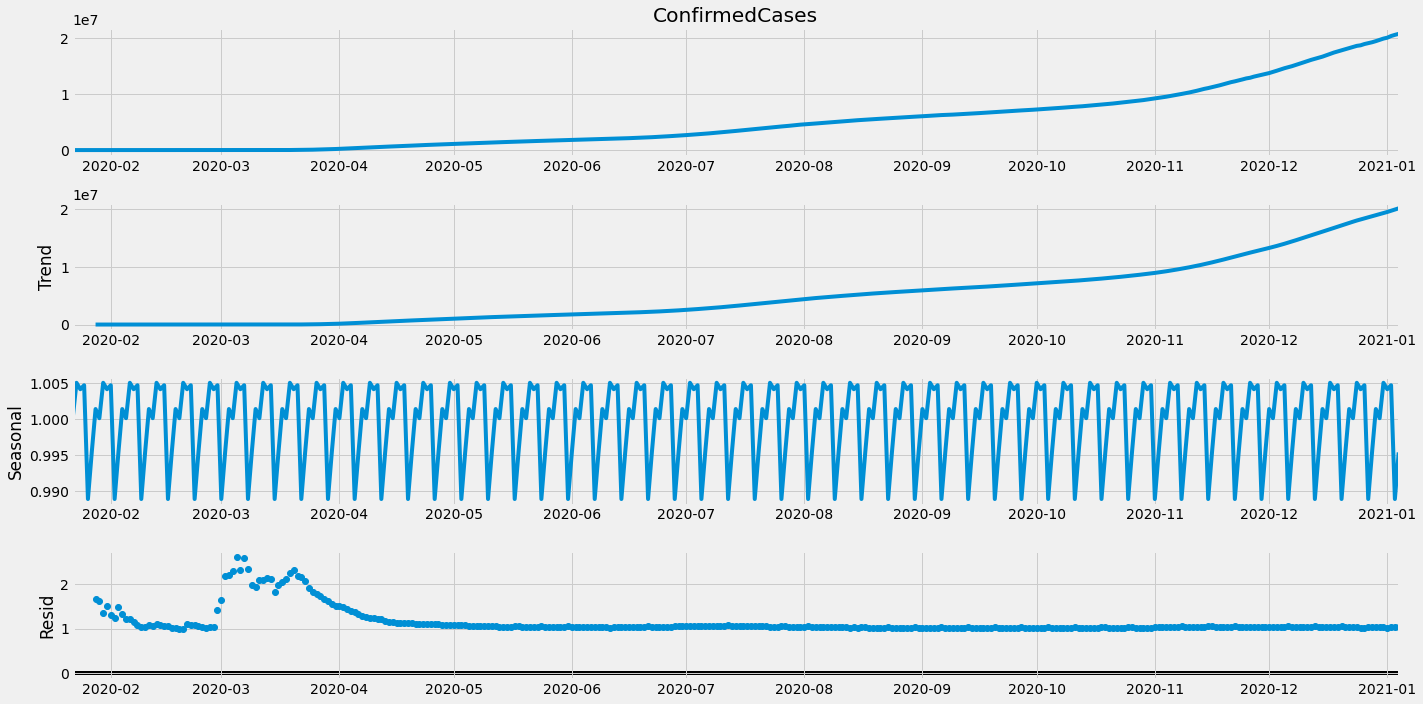

In [49]:
results = seasonal_decompose(usa_df['ConfirmedCases'], two_sided = False,
                            model = 'multiplicative')
results.plot()
plt.show()

In [50]:
results.resid[:10]

Date
2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25         NaN
2020-01-26         NaN
2020-01-27         NaN
2020-01-28    1.664264
2020-01-29    1.615113
2020-01-30    1.347985
2020-01-31    1.507198
Freq: D, Name: resid, dtype: float64

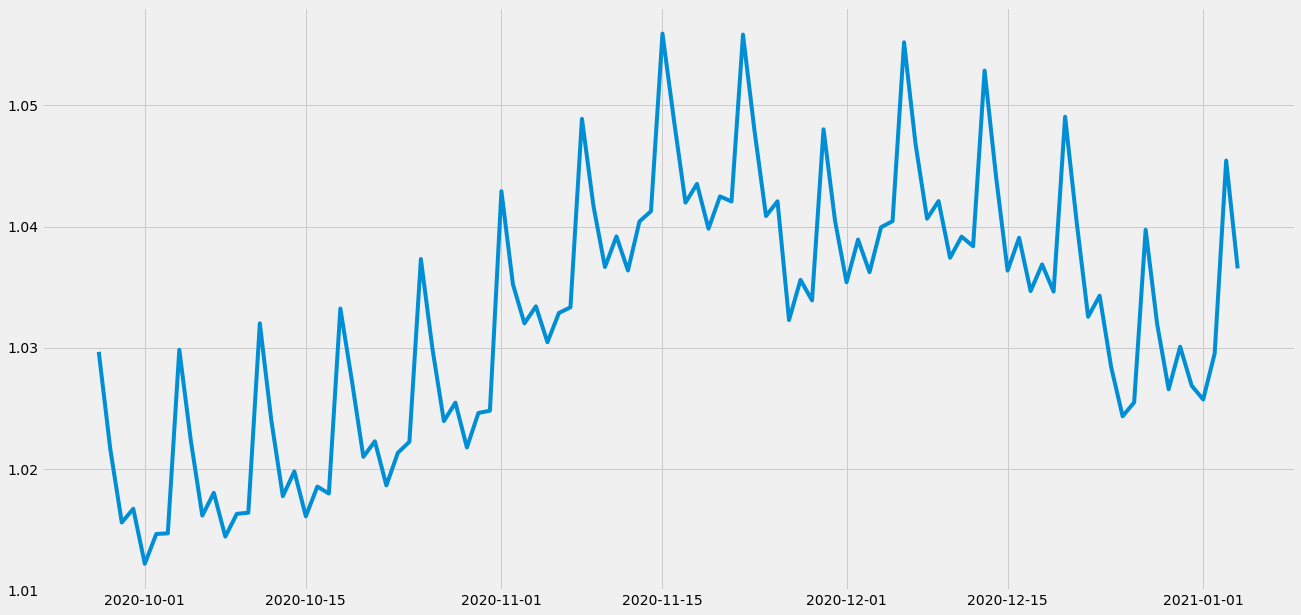

In [51]:
plt.plot(results.resid[-100:])

# Random Walk
for reference

Random Walk RMSE
0.7380379362234516


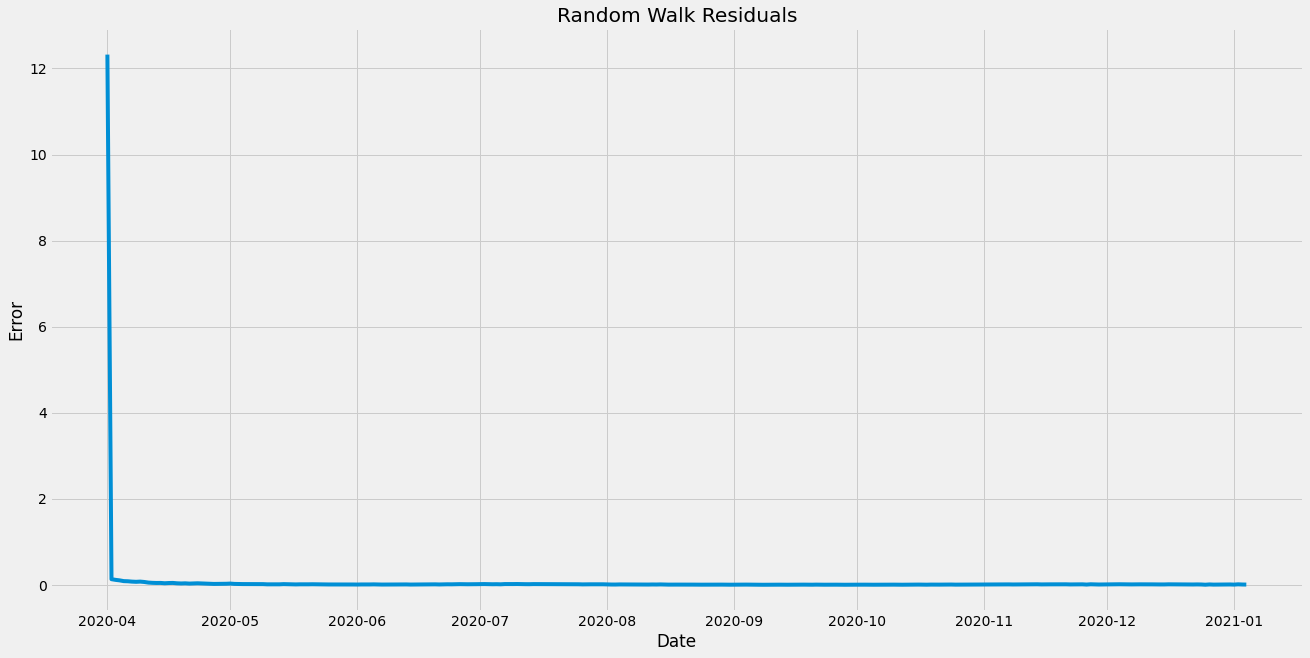

In [52]:
true = train_df
pred = true.shift().fillna(0)
print('Random Walk RMSE')
RW_RMSE = np.sqrt(mean_squared_error(true,pred))
print(RW_RMSE)
plt.plot(true.index,true-pred, label = 'Error')
plt.xlabel('Date')
plt.ylabel('Error')
plt.title('Random Walk Residuals')
plt.show()

true = results.resid[6:].fillna(0)
pred = true.shift().fillna(0)
print('Random Walk RMSE')
RW_RMSE = np.sqrt(mean_squared_error(true,pred))
print(RW_RMSE)
plt.plot(true.index,true-pred, label = 'Error')
plt.xlabel('Date')
plt.ylabel('Error')
plt.title('Random Walk Residuals')
plt.show()

# FSM
Our true FSM is a random walk, but let's do a simple ARIMA as well.
I suspect we will need a Sarima model, but lets start our FSM with an Arima model.

In [53]:
train = true[:-int(len(true)*.2)]
test = true[-int(len(true)*.2):]

# Training set predictions

FSM One-Step RMSE
0.005419111119849455
FSM Dynamic RMSE from August to November
0.5975176013897424


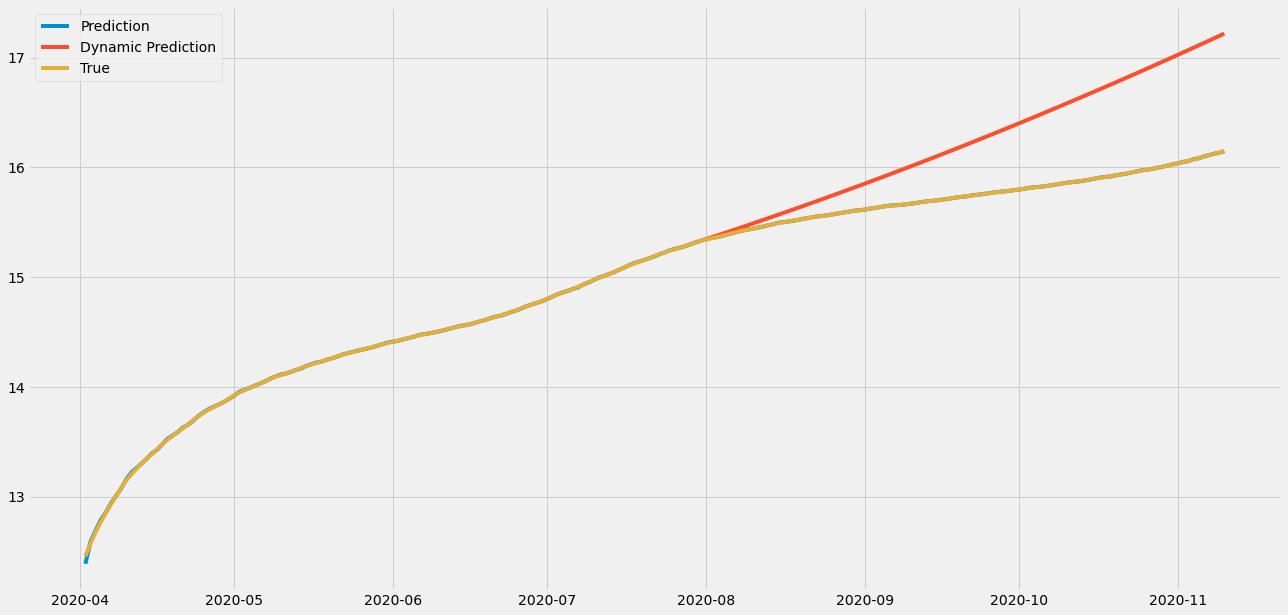

In [54]:
from statsmodels.tsa.arima_model import ARIMA
fsm = ARIMA(endog = train, order = (1,1,0), freq = 'd').fit()
y_hat = fsm.predict(typ='levels')
y_hat_dy = fsm.predict(start = '2020-08-01', 
                    end = train.index[-1], typ='levels', dynamic = True)
print('FSM One-Step RMSE')
FSM_RMSE = np.sqrt(mean_squared_error(train[1:], y_hat))
print(FSM_RMSE)
print('FSM Dynamic RMSE from August to November')
print(np.sqrt(mean_squared_error(train[train.index >= '2020-08-01'],y_hat_dy)))

fig, ax = plt.subplots()
ax.plot(y_hat, label = 'Prediction')
ax.plot(y_hat_dy, label = 'Dynamic Prediction')

ax.plot(train[1:], label = 'True')
plt.legend()

## FSM Evaluation
Our one-step ahead prediction accuracy beats the random walk, However, our dynamic prediction from August to November does not, with an RMSE of 658. It essentially predicts a straight line.

We are seeing the weekly seasonality again with these results, next I will try a SARIMA model to see if I can correct for, or incorporate that seasonality.  It may be that our ARIMA model has captured something of the trend in the data, but not the seasonality.